# Interactive Python Web-mapping: A Trip to the Illinois State Fair

After this tutorial, you will be able to create a map that looks something like this one:

<img src="img/final_map.png" width="500">

## Part 1: Running Cells

**Code** is instructions written in a programming language. That means instructions that are written in a way that a computer can understand and follow. This notebook contains code that can be run, so you can look at the code and see what it does in the same place! Code can be run from **code cells**, which look like this: 

<img src="img/cell.png" width="500">

Code cells can contain text or code. If some text starts with this sign: `#` it is a **comment**, or a note for a human. The cell right below this sentence is a code cell that contains a comment.

When you **run** a code cell, a number will appear in between the brackets. Often some **output** will be made by running the cell. This will usually be displayed below the cell.
<img src="img/run_cell.png" width="800">

To **run a cell** click within the grey box and press the `Run` button on the toolbar. You can see the `Run` button in the image below.

<img src="img/run_menu.png" width="300">

If you change something in a cell you need to **run it again** (press `Run` another time) to update the output.

When something doesn't run correctly an error will appear. That looks like this:
<img src="img/error.png" width="800">

### Look at the following cell. What do you think the output will be? Then run it!

In [4]:
print("hello")

hello


A comment is some text that starts with a `#`. Comments provide info and can be used to prevent a line of code from running.

### Look at the following 2 cells. What do you think the output will be? Then run them!

In [5]:
print("hello") # this gives more information but the code still runs

hello


In [6]:
# print("hello") # now the whole line is a comment (no output)

## Part 2: Introducing the Folium Python Library

For this tutorial, we will use the **Python** as the programming language. Python is a common language used for writing code. A **Python library** is a collection of code that someone else has already written that is intended to be used over and over again! We will use the **Folium library** to help map things. It's really useful because you won't have to build a whole system from scratch in order to create a cool map and display it on the screen!

First we need to tell Python that we are using the Folium library. We do that using the `import` command, where we type the name of the library in the form that Python is expecting (Python is expecting it to be lowercase) after the word `import`. 

**Run** this next cell to tell Python to use the Folium library and a few other libraries we'll use for this. Here we are just telling Python to use the libraries we want, so there is no output.

In [1]:
# import libraries - this cell needs to be run for the rest of the notebook to work!

import folium # folium map library

import os # for reading files
import geopandas as gpd # for reading geospatial data
import pandas as pd # for reading data
from geopy.distance import distance # for calculating distance

### Note: Dealing with Errors
Writing Python code is like writing out a recipe. There are some parts that need to be written very specifically in a certain form and others parts that are more flexible. Try to follow the examples closely until you learn what parts are flexible. If you have a space or comma in the wrong place or a missing bracket (`[` or `}`) or parenthesis `)` Python will likely get mad and you will get an error!

## Creating Your First Map: Build a Map Sandwich!

Creating a map with **Folium** is like building a sandwich. To create any map, you must have two pieces: we can call them the top of the bun and the bottom of the bun. Like so:

<img src="img/bun2.png" width="500">

This diagram shows the simplest example of a map that you can make. You can see basic map by **running** the next cell.

In [7]:
my_map = folium.Map([41.88,-87.66])

my_map

### Let's talk about this map

What do you see? Where is this? Take a moment to describe different things you can see on this map. Use your mouse to click and drag different parts of the map. What you can do with it?

You can interact with the map! You can zoom in and out by clicking the `+` and `-` buttons and drag the map with your mouse to move from side to side. If you want to go back to the starting position, **run** the cell again!

All of this with 2 lines of code - not bad!

This simple starting map is called the **base map**. Everything else you add to the map will go on top of this.

Lets break it down (these section introduces common ways to talk about each of the pieces):
- `my_map` - this is a **Python variable name**, which is a fancy way of saying the name that you call your map. Every time you need to refer to your map you need to use the same name written the same way (i.e. lower case with an underscore between the two words).
- `=` - this is the way in Python you link some data, in this case your actual map, to a variable name. You can say you assigned a unique version of a map object to the variable named `my_map`.
- `folium.Map(` - this is part of the recipe that you can't change and have it still work. This tells the Folium library that you want to make a map.
- `[41.88,-87.66]` - these are the **coordinate number pairs** representing **latitude** and **longitude**. This tells the library where you want your map. They must be in the square brackets (`[]`) because that's how Folium wants it!
- `)` - this tells Folium that you have given it everything you wanted to make the first map. If you delete this Folium will be angry.
- `my_map` - this tells Python to actually show your map! Note that if you delete this your map will still be created but you won't see anything. That's why you should have this on your last line for every map you map in this tutorial.

And that's it!

However, it isn't a very interesting map yet is it?
This sandwich needs some fillings! 

### Side-note: Latitude and Longitude

The **coordinate number pair** we used in the previous map has two numbers that stand for **latitude** and **longitude**. **Latitude** and **longitude** are like `X` and `Y` coordinates you may have used in Math class. **Latitude** and **longitude** can help you find your position on the Earth. Latitude indicates how far north or south you are from the equator, and longitude is for how far east or west you are from the prime meridian.

<img src="img/grids.png" width="500">

### Creating Your First Map: Adding Fillings!

<img src="img/bun1.png" width="500">

What I'm calling **fillings** here is actual content that you can add to your map. While an actual sandwich can only be so  tall before you can't eat it, our maps can have as many fillings as you want and you can mix even filling types (we'll explore that later).

In the next cell we have a basic map with one filling: a **marker**. Think of a marker as a pin that you can stick in a certain point on a map. Before you run the next cell, try to imagine what you think the marker might look like.

In [11]:
my_map = folium.Map([41.8233, -87.4158])
folium.Marker([41.88, -87.66]).add_to(my_map)
my_map

The new pieces here are `folium.Marker()` and `.add_to(my_map)`. Folium needs the `.add_to()` function exactly as written to link your marker to your map. You link it by putting the variable name for your map, in this case `my_map` in the parenthesis after `.add_to`.

## Part 3: Easily Get Coordinates in Folium

**Run** the next cell. In the map in the next cell, click on the map to see a window pop up with the coordinates displayed in the window like in the image below. You can select the text with your mouse and copy and paste to easily find coordinates for things you want to map in the next section! The Folium library supports this automatically with a `folium.LatLngPopup()` function.

<img src="img/popuploc.png" width="200">

In [17]:
lat_long_map = folium.Map(location=[39.8370, -89.6416], zoom_start=15, height=400)
lat_long_map.add_child(folium.LatLngPopup())
lat_long_map

## Part 4: Looking up More Options in Folium

At this point in the tutorial you may want to find out more information about Folium. You can find a user guide here: https://python-visualization.github.io/folium/latest/user_guide.html . To look to see what different types of kewords and extra things Folium has that you can use! A master list can be found here: https://python-visualization.github.io/folium/modules.html . You can search for the name of what you want to edit. Note that things like `folium.Map()` and `folium.Marker()` are called **classes**.

Note that this is written for people who code and it's OK if it is a little difficult to understand at first. Using what you have learned you should be able to try out new combinations.

## Part 5: Mapping the Illinois State Fair!

Now we can use the Folium library to map out a trip to the Illinois State Fair! Do you know what city the Illinois State Fair is in?

For this project we will use these datasets:
- `isfmap.png` - [Illinois State Fair map (converted into .png)](https://statefair.illinois.gov/content/dam/soi/en/web/statefair/info/documents/isfmap.pdf)
- [Illinois State Fair food vendors website](https://statefair.illinois.gov/food/vendors.html)
- `top_14.csv` - [Illinois State Fair events for Aug 10, 2024 (exported as .csv and edited)](https://statefair.illinois.gov/info/schedules/firstrespondersday.html)

First let's create a base-map. The following map shows a map of the fair overlaid onto the Folium base-map along with the Latitude and Longitude popup. You can use this map for reference.


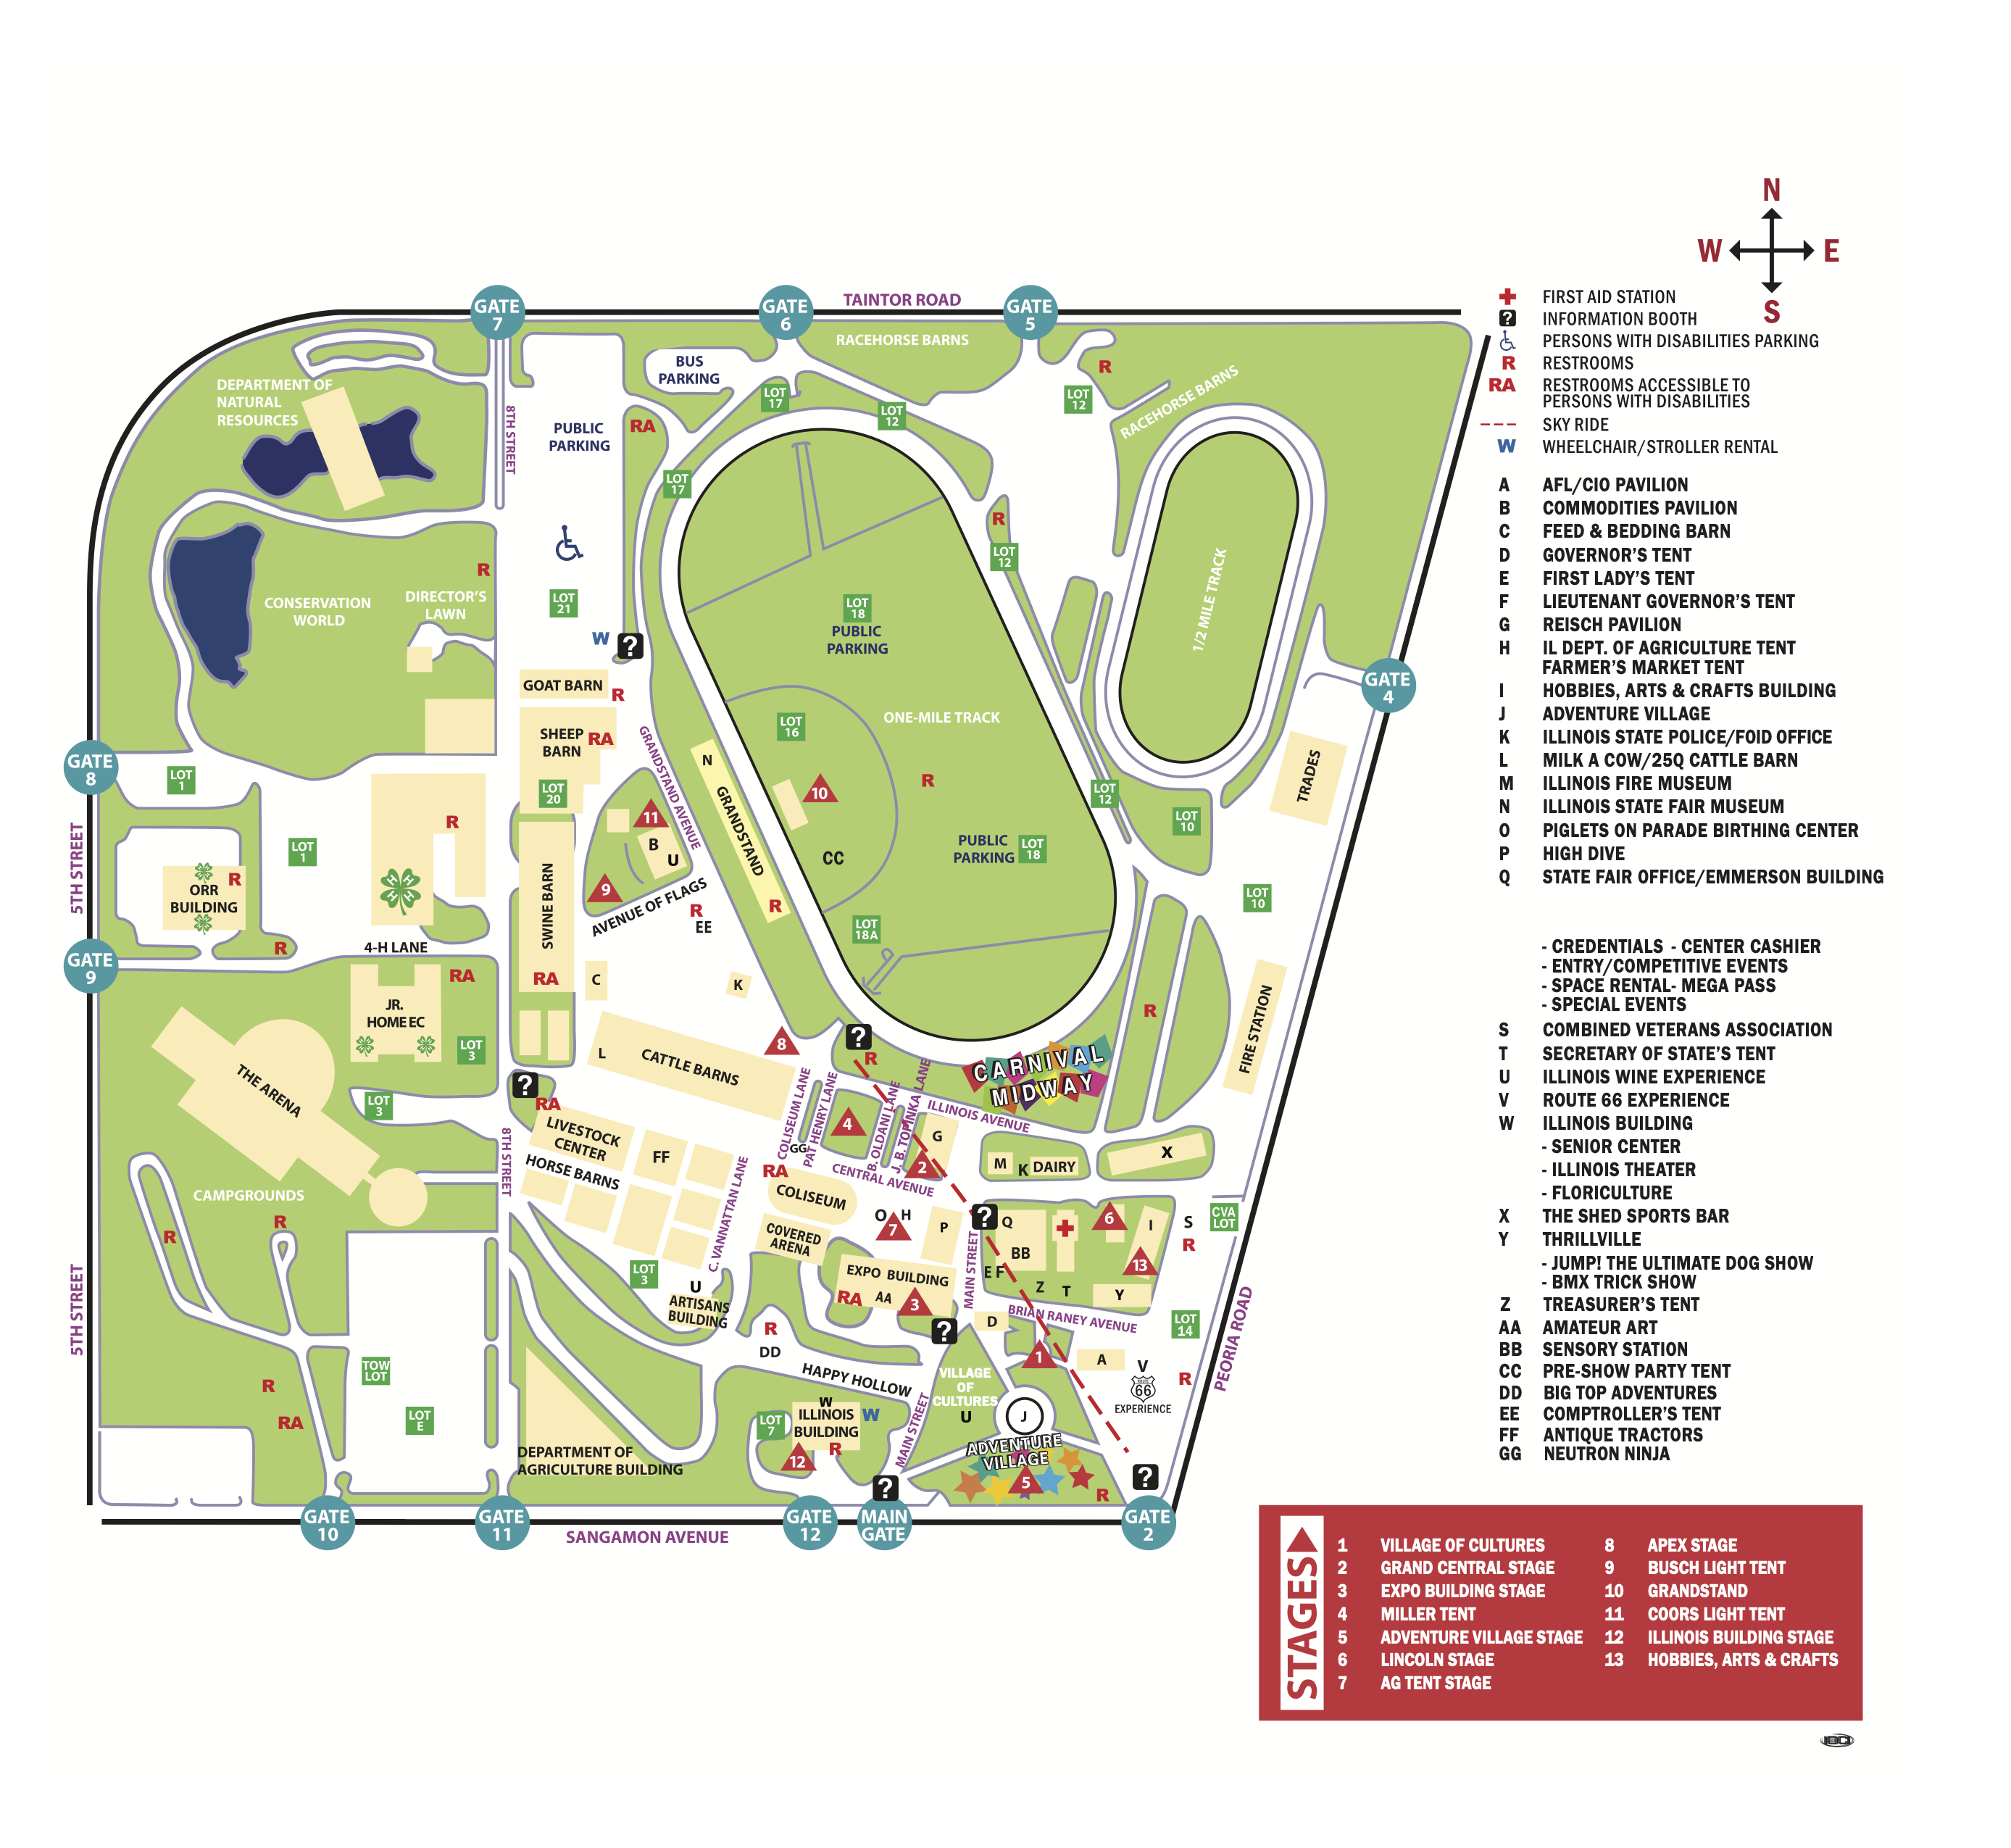

In [18]:
my_map = folium.Map([39.8370, -89.6416], zoom_start=15, width=800, height=400)

img = folium.raster_layers.ImageOverlay(
    name="Illinois State Fair Map",
    image="img/isfmap.png",
    bounds=[[39.8441, -89.6505], [39.8284, -89.6272]],
    opacity=0.9
)

img.add_to(my_map)
folium.LayerControl().add_to(my_map)
my_map.add_child(folium.LatLngPopup())

my_map

## Lets Get Some Deep Fried Oreos!

Oh no! The pin isn't placed properly. Follow these instructions to move the pin to the correct location for a vendor that sells oreos!
- Go to https://statefair.illinois.gov/food/vendors.html
- Search in the vendors web page for `oreo` 
- Copy the link for Alan McKinney Food Services (it should start something like https://www.google.com/maps/place/39.8...)
- See the Latitude and Longitude in the link?
- Extract coordinates from the link: (note `%20` means a space in a url, so remove it!)
- Change the coordinates in the parentheses after `alan_food_location =` in the next cell to the correct ones for the oreo stand and re-run the map cell to display the pin at the correct location

In [62]:
# You can copy the link for Alan McKinney Food Services in the next line
# 

In [63]:
# Change this coordinate to the location of Alan McKinney Food Services
alan_food_location = (39.8380, -89.6306)

In [54]:
my_map = folium.Map([39.8370, -89.6416], zoom_start=15, width=800, height=400)

folium.map.Marker(location=alan_food_location,
                  tooltip='Alan McKinney Food Services: Deep Fried Oreos').add_to(my_map)

my_map

If you have plugged in the correct coordinates, your map should look like this:

<img src="img/oreos.png" width="800">

## How far is it from the Main Gate to the Oreo Stand?

Most people enter the fair through the main gate. Find the coordinates for the Main Gate on the fair map with the Latitude Longitude window and fix the coordinate position on the next map. The main gate on the fair map looks like this:

<img src="img/maingate.png" width="100">

Also adjust the pin for Alan McKinney Food Services to the correct one from the previous step.

In [ ]:
# You can copy the coordinates for the Main Gate in the next lines
# remember, text that isn't code needs a hash at the beginning so you don't get an error if you run this cell
# 
# 

In [60]:
# Change this coordinate to the location of the Main Gate
main_gate_location = (39.8340, -89.6306)

In [73]:
# Calculate the distance
main_to_oreo_distance = round(distance(alan_food_location, main_gate_location).ft)
print("The distance between the main gate and the oreo stand is: ", main_to_oreo_distance, "feet")

The distance between the main gate and the oreo stand is:  1457 feet


In [116]:
my_map = folium.Map([39.8370, -89.6416], zoom_start=15, width=800, height=400)

folium.map.Marker(location=alan_food_location,
                  tooltip='Alan McKinney Food Services: Deep Fried Oreos').add_to(my_map)
folium.map.Marker(location=main_gate_location,
                  tooltip='Main Gate').add_to(my_map)
folium.PolyLine(
    locations=[alan_food_location, 
               main_gate_location],
    popup='My Path to Oreos!',
    color='red',
).add_to(my_map)

my_map

# Planning your day

There are so many activities you can do at the State Fair! A list of activities on August 10 can be found from [Illinois State Fair events for Aug 10, 2024](https://statefair.illinois.gov/info/schedules/firstrespondersday.html). In the next cell, I've used Python packages `Pandas` and `GeoPandas` to read in the file as a `GeoDataFrame` which is a nice format to use in this notebook.

In [47]:
# read in data using pandas
activities_csv = pd.read_csv('data/top_14.csv')
# convert to geodataframe using geopandas
activities = gpd.GeoDataFrame(activities_csv, 
                              geometry=gpd.points_from_xy(activities_csv.Longitude, activities_csv.Latitude))
# convert to json format
activities_json = activities.to_json()

You can see the data in the next cell.

In [89]:
activities

,Name,Date,StartTime,Hours,Location,Latitude,Longitude,geometry
0,Jr Rabbit Show,8/10/24,9:30,1,Sale Barn 26,39.835546,-89.643584,POINT (-89.64358 39.83555)
1,Be a Climate Action Hero! (10a-7p),8/10/24,10:00,9,Conservation World,39.838853,-89.646544,POINT (-89.64654 39.83885)
2,Artisan Market (10a-5p),8/10/24,10:00,7,IL Dept of Ag Tent,39.833800,-89.640000,POINT (-89.64000 39.83380)
3,Harness Racing,8/10/24,11:00,1,Grandstand,39.836958,-89.642031,POINT (-89.64203 39.83696)
4,Fiddle & Banjo Contest,8/10/24,11:00,1,Lincoln Stage,39.833700,-89.637600,POINT (-89.63760 39.83370)
5,Illinois State Parks (10a-7p),8/10/24,12:00,9,Conservation World,39.838853,-89.646544,POINT (-89.64654 39.83885)
6,Zoo Lady Face Painting (12p-6p),8/10/24,13:00,6,Adventure Village Pavilion,39.832100,-89.638600,POINT (-89.63860 39.83210)
7,144th Army - Woodwind Quartet,8/10/24,13:00,1,Expo Bldg Stage,39.833000,-89.639900,POINT (-89.63990 39.83300)
8,Big Top Adventures Circus,8/10/24,13:00,1,Happy Hollow,39.832600,-89.641600,POINT (-89.64160 39.83260)
9,High Dive Show,8/10/24,15:30,1,Central & Main,39.833600,-89.639600,POINT (-89.63960 39.83360)


Now we can pull a few activities by the `index` (the number displayed on the far left), and create an array for storing coordinates in the next 2 cells.

In [118]:
# store data for the Climate Hero activity
climate_hero_activity = activities.loc[1]
climate_hero_location = (climate_hero_activity.Latitude,
                         climate_hero_activity.Longitude)

print(climate_hero_activity.Name)
print(climate_hero_location)

Be a Climate Action Hero! (10a-7p)
(39.83885296106213, -89.64654415625388)


In [119]:
# store data for the Harness Racing activity
harness_racing_activity = activities.loc[3]
harness_racing_location = (harness_racing_activity.Latitude,
                           harness_racing_activity.Longitude)

print(harness_racing_activity.Name)
print(harness_racing_location)

Harness Racing
(39.83695846277228, -89.6420311829122)


Now we can use the name and location for these two activities to make a map!

In [117]:
my_map = folium.Map([39.8370, -89.6416], zoom_start=15, width=800, height=400)

folium.map.Marker(location=climate_hero_location,
                  tooltip=climate_hero_activity.Name).add_to(my_map)

folium.map.Marker(location=harness_racing_location,
                  tooltip=harness_racing_activity.Name).add_to(my_map)

folium.PolyLine(
    locations=[climate_hero_location,
               harness_racing_location],
    popup='My route',
    color='blue',
).add_to(my_map)

my_map

### Map all the activities

Sometimes, it's easier to just map all the activities! We can use the `activities_json` data we created earlier to map all the activities at once using `folium.GeoJson()`!


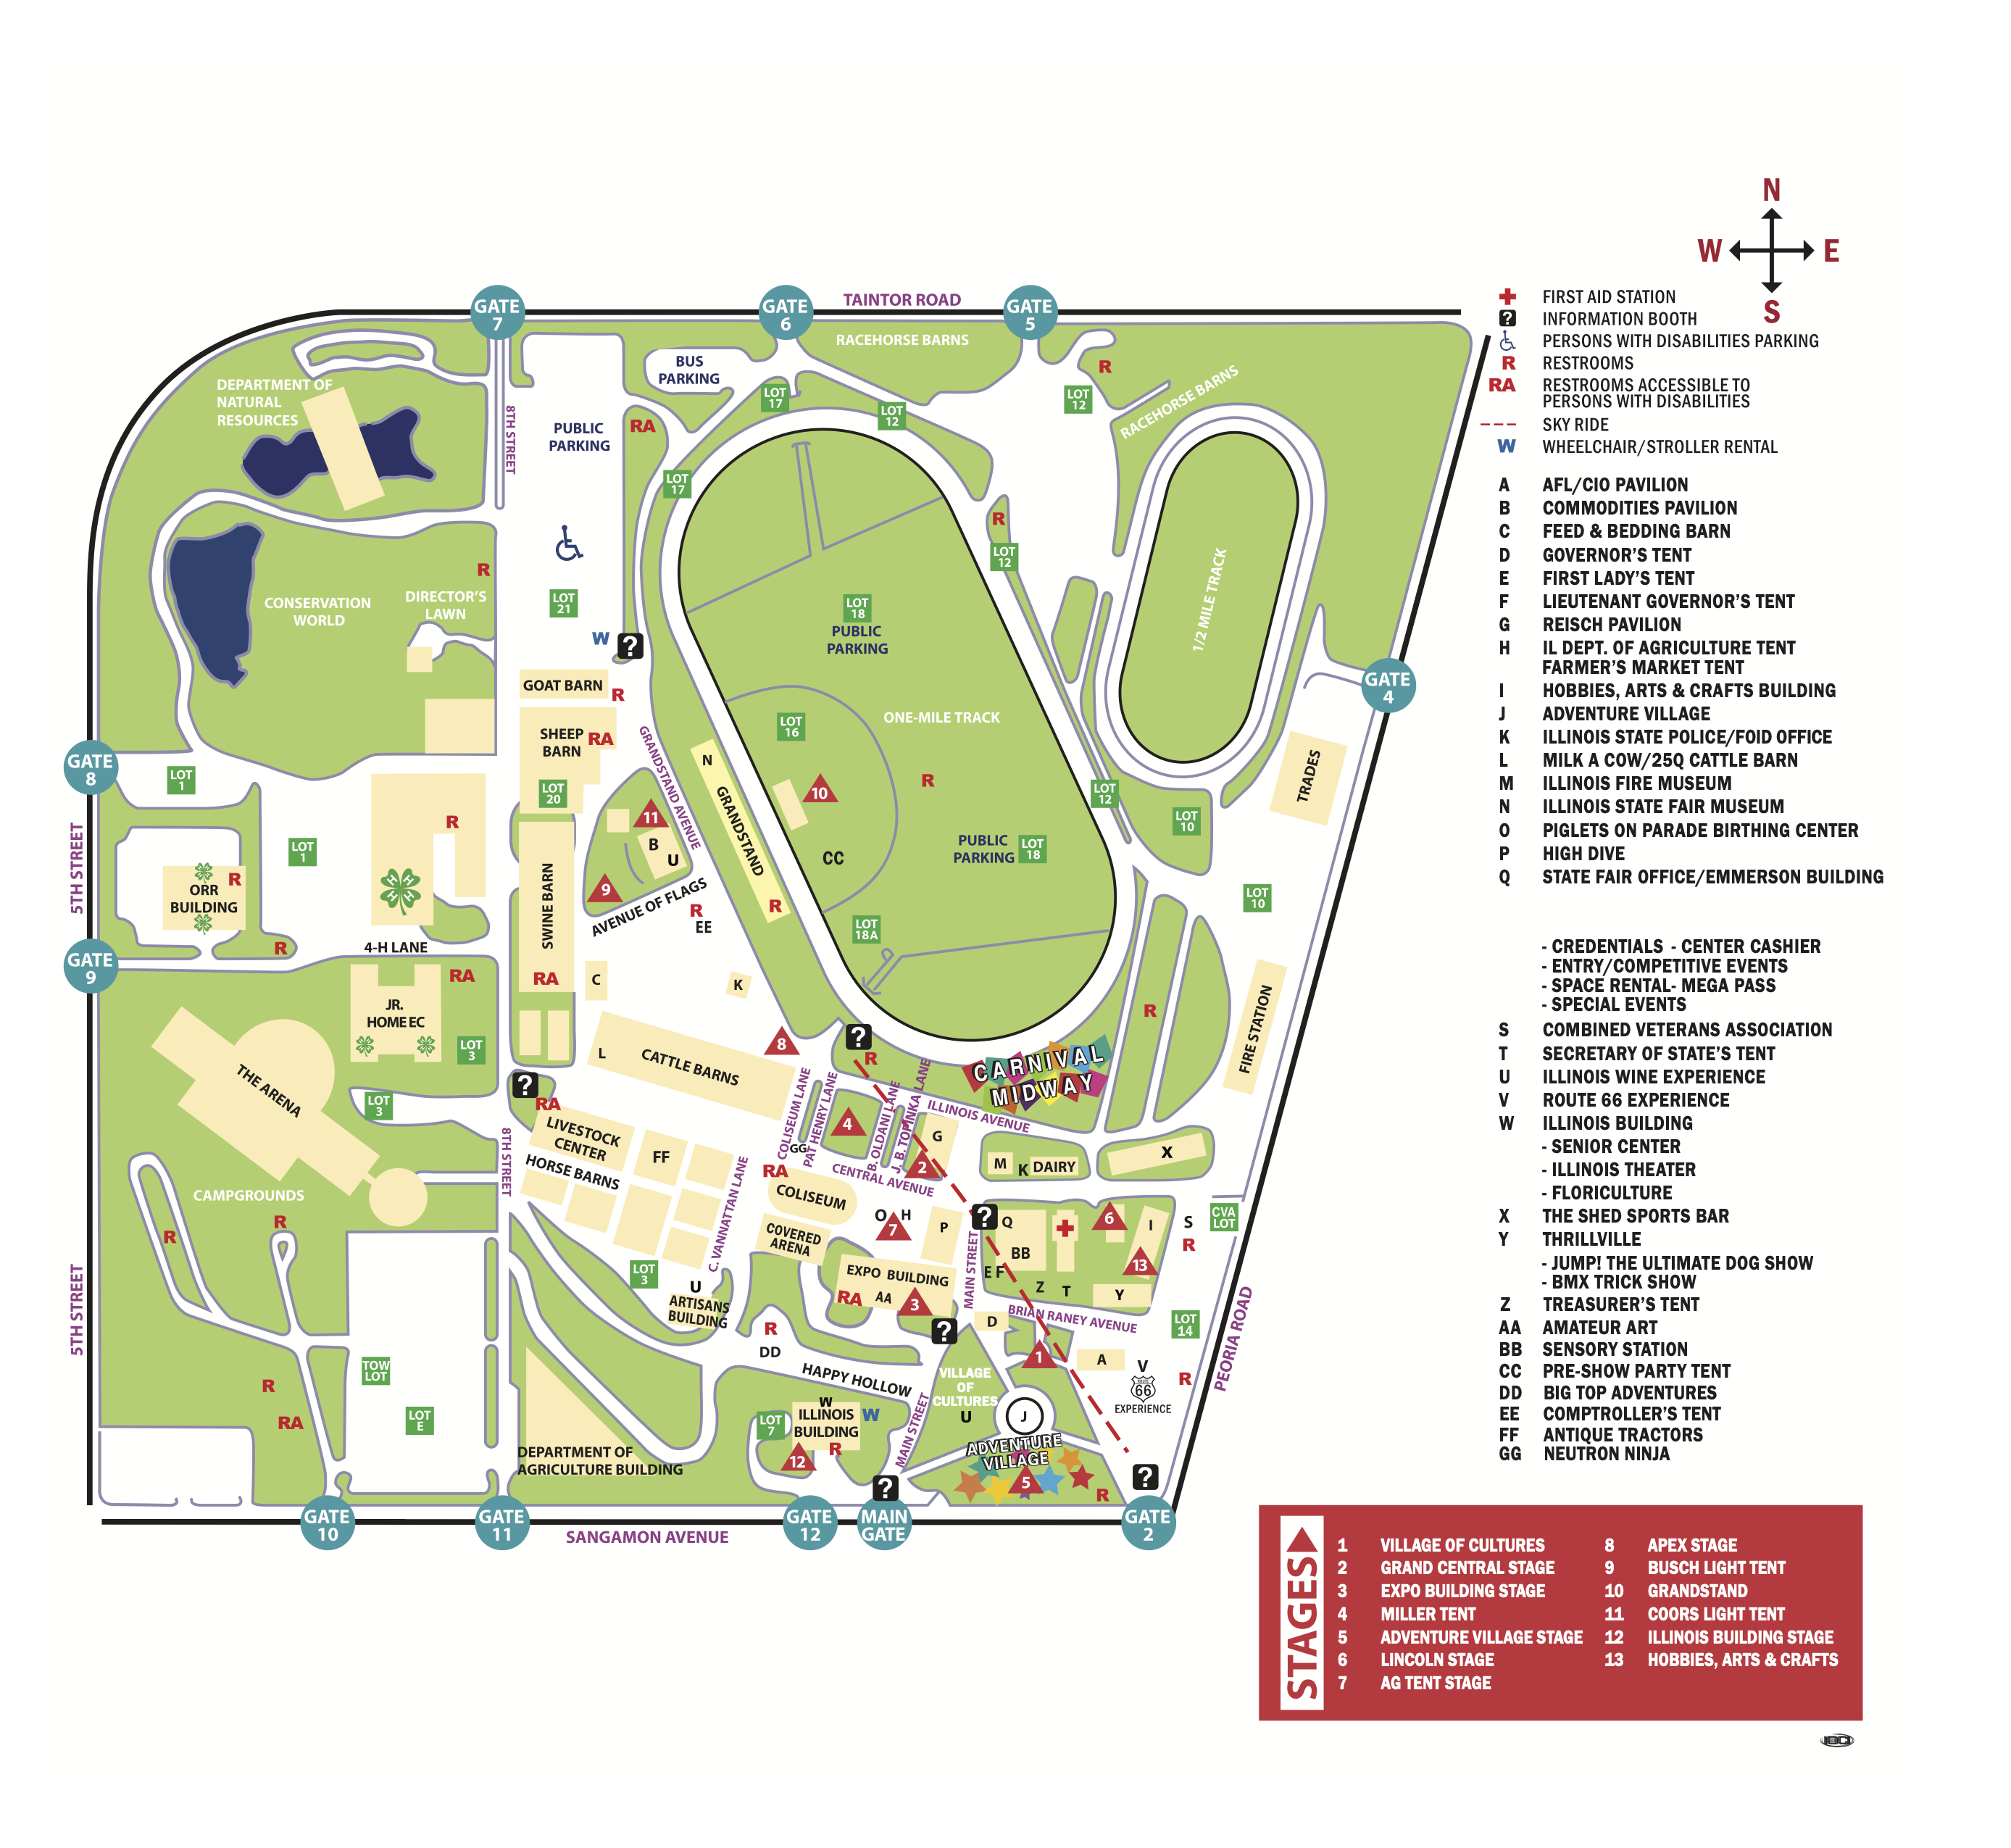

In [98]:
my_map = folium.Map([39.8370, -89.6416], zoom_start=15, width=800, height=400)

img = folium.raster_layers.ImageOverlay(
    name="Illinois State Fair Map",
    image="img/isfmap.png",
    bounds=[[39.8441, -89.6505], [39.8284, -89.6272]],
    opacity=0.9,
    cross_origin=False,
    zindex=1,
)

popup = folium.GeoJsonPopup(fields=["Name", "StartTime"],
    aliases=["Activity", "Start"],
    labels=True)

img.add_to(my_map)
folium.GeoJson(activities_json, popup=popup).add_to(my_map)
folium.LayerControl().add_to(my_map)

my_map

## Your Turn: Make an Interactive Map

Using the following code cell, change and add features to make your own map!
- Option A: Looking at the events and the vendors pages, map out a route you would like to take between vendors and activities
- Option B: Use what you learned to map one of the activities you did at camp

In [50]:
my_map = folium.Map([40.1095,-88.2260], zoom_start=20, width=800, height=400)
folium.map.Marker(location=[40.1095,-88.2260],
                  tooltip='You are here (Natural History Building)').add_to(my_map)
my_map